In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-worldwide-refined-dataset/covid_dataset.csv


In [3]:
import pandas as pd
df = pd.read_csv('/kaggle/input/covid-19-worldwide-refined-dataset/covid_dataset.csv')

In [4]:
df.head()


,Unnamed: 0,country,code,confirmed,recovered,critical,deaths,lastChange,lastUpdate
0,0,Afghanistan,AF,234174,211080,0,7996,2024-06-04T00:18:51+00:00,2024-08-09T09:13:41+00:00
1,2,Albania,AL,334863,330233,0,3605,2024-06-04T00:27:05+00:00,2024-08-09T09:13:41+00:00
2,3,Algeria,DZ,272010,183061,0,6881,2024-06-04T00:19:02+00:00,2024-08-09T09:13:41+00:00
3,5,Andorra,AD,48015,47563,0,165,2024-02-11T22:05:54+00:00,2024-08-09T09:13:41+00:00
4,6,Angola,AO,107327,103419,0,1937,2024-06-04T00:20:45+00:00,2024-08-09T09:13:41+00:00


In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     225 non-null    object
 1   code        224 non-null    object
 2   confirmed   225 non-null    int64 
 3   recovered   225 non-null    int64 
 4   critical    225 non-null    int64 
 5   deaths      225 non-null    int64 
 6   lastChange  225 non-null    object
 7   lastUpdate  225 non-null    object
dtypes: int64(4), object(4)
memory usage: 14.2+ KB


In [7]:
df['lastChange'] = pd.to_datetime(df['lastChange'])


In [8]:
df['lastUpdate'] = pd.to_datetime(df['lastUpdate'])


In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
confirmed,225.0,3.116295e+06,1.014304e+07,10.0,27334.0,230354.0,1356546.0,111820082.0
recovered,225.0,2.624231e+06,9.313309e+06,0.0,15427.0,140622.0,1258432.0,109814428.0
critical,225.0,1.278667e+01,7.208972e+01,0.0,0.0,0.0,0.0,940.0
deaths,225.0,3.117617e+04,1.105688e+05,0.0,194.0,2250.0,16303.0,1219487.0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
statistics = df[['confirmed', 'recovered', 'deaths']].describe()

statistics

,confirmed,recovered,deaths
count,2.250000e+02,2.250000e+02,2.250000e+02
mean,3.116295e+06,2.624231e+06,3.117617e+04
std,1.014304e+07,9.313309e+06,1.105688e+05
min,1.000000e+01,0.000000e+00,0.000000e+00
25%,2.733400e+04,1.542700e+04,1.940000e+02
50%,2.303540e+05,1.406220e+05,2.250000e+03
75%,1.356546e+06,1.258432e+06,1.630300e+04
max,1.118201e+08,1.098144e+08,1.219487e+06


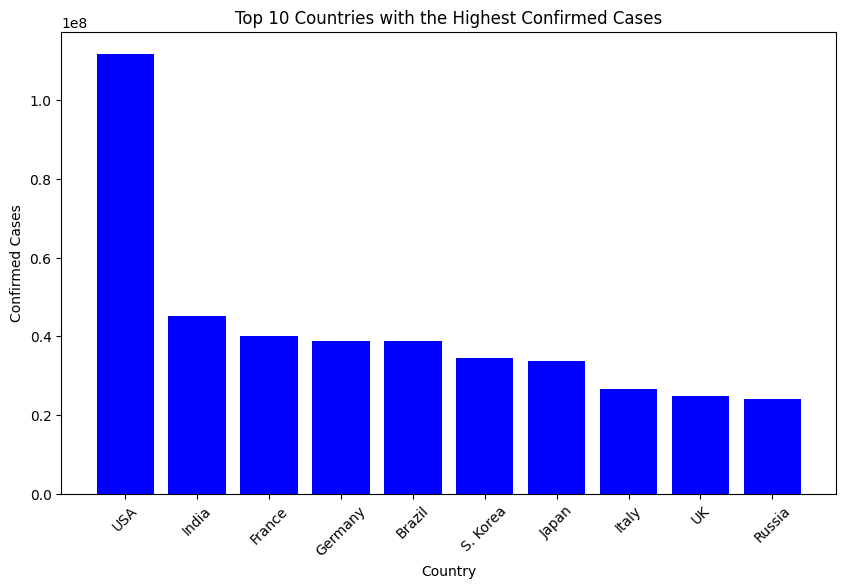

In [12]:
top10_countries = df.sort_values(by='confirmed', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top10_countries['country'], top10_countries['confirmed'], color='blue')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries with the Highest Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

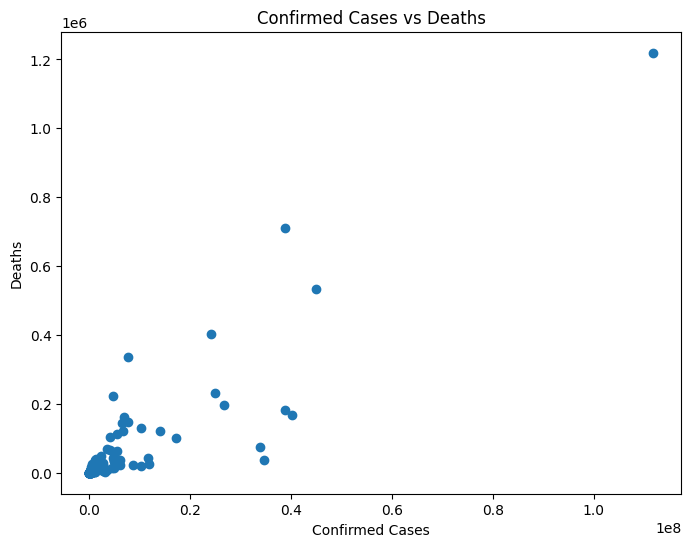

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df['confirmed'], df['deaths'])
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.title('Confirmed Cases vs Deaths')
plt.show()

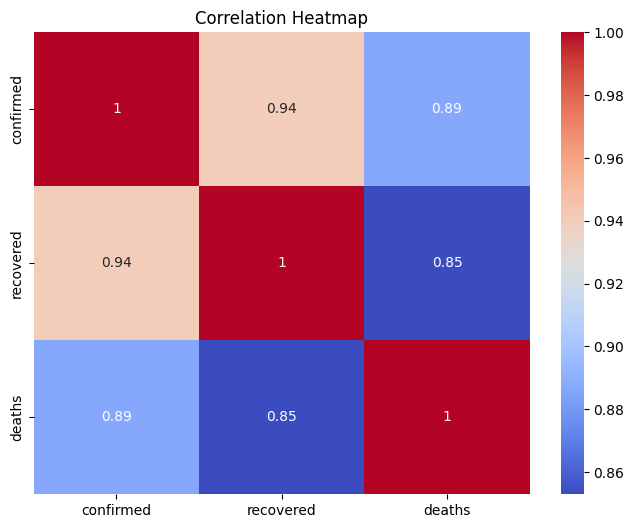

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['confirmed', 'recovered', 'deaths']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [15]:
import plotly.express as px

fig = px.choropleth(data_frame=df,
                    locations="country", 
                    locationmode='country names',  
                    color="confirmed",  
                    hover_name="country", 
                    color_continuous_scale="Reds", 
                    labels={'confirmed':'Confirmed Cases'},  
                    projection="natural earth")  

fig.update_layout(title_text="COVID-19 Confirmed Cases by Country",
                  geo=dict(showframe=False, showcoastlines=False))

fig.show()